In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import datetime
from datetime import timedelta
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import HTML

In [2]:
# start_date = widgets.Text(continuous_update=False)
# date_format = '%Y-%m-%d'
# def label_checker():
#     while True:
#         try:
#             datetime.datetime.strptime(str(start_date.value), date_format)
#             break
#         except ValueError:
#             widgets.Label('Provided date is not in correct format')
            
# start_date_box = widgets.VBox([widgets.Label('Please enter the start date for the investment in the YYYY-MM-DD format: '), start_date])
# display(start_date_box)

In [49]:
start_date = input('Please enter the start date for the investment in the YYYY-MM-DD format: ')
date_format = '%Y-%m-%d'
while True:
    try:
        datetime.datetime.strptime(start_date, date_format)
        break
    except ValueError:
        print('Provided date is not in correct format')
        start_date = input('Please enter the start date for the investment in the YYYY-MM-DD format: ')
        
while start_date < '2002-03-01':
    print('Sorry, the earliest record available is for 2002-03-01')
    start_date = input('Please enter the start date for the investment in the YYYY-MM-DD format: ')

Please enter the start date for the investment in the YYYY-MM-DD format:  2008-08-24


'2002-01-04'

In [50]:
year, month, day = map(int, start_date.split('-'))
next_date = datetime.date(year, month, day) + timedelta(30)
end_date = next_date.strftime('%Y') + '-' + next_date.strftime('%m') + '-' + next_date.strftime('%d') 
nbp_import = requests.get('http://api.nbp.pl/api/exchangerates/tables/A/{stdate}/{endate}/'.format(stdate = str(start_date), endate = str(end_date)))
ccy_series = nbp_import.json()
table_frame = pd.DataFrame(ccy_series)
uncut_rates = table_frame['rates']
rates = [pd.DataFrame(line).set_index('code') for line in uncut_rates]
ccy_series = (pd.concat([rates[table]['mid'] for table in range(0, len(rates))], axis=1).transpose()).set_index(table_frame['effectiveDate'])
headers = [header for header in ccy_series]

In [51]:
request_1 = 'Please enter the first currency (ISO format) forfthe investment: '
request_2 = 'Please enter the second currency (ISO format) for the investment: '
request_3 = 'Please enter the third currency (ISO format) for the investment: '

response_1 = 'Currency is not in ISO format'
response_2 = 'Unfortunately, we do not have such currency in our database'
response_3 = 'You have already selected this currency'
CCY_IN1 = str(input(request_1))
CCY_IN1 = CCY_IN1.upper()
while len(CCY_IN1) != 3:
    print(response_1)
    CCY_IN1 = str(input(request_1))
    CCY_IN1 = CCY_IN1.upper()
while CCY_IN1 not in headers:
    print(response_2)
    CCY_IN1 = str(input(request_1))
    CCY_IN1 = CCY_IN1.upper()
CCY_IN2 = str(input(request_2))
CCY_IN2 = CCY_IN2.upper()
while len(CCY_IN2) != 3:
    print(response_1)
    CCY_IN2 = str(input(request_2))
    CCY_IN2 = CCY_IN2.upper()
while CCY_IN2 == CCY_IN1:
    print(response_3)
    CCY_IN2 = str(input(request_2))
    CCY_IN2 = CCY_IN2.upper()
while CCY_IN2 not in headers:
    print(response_2)
    CCY_IN2 = str(input(request_2))
    CCY_IN2 = CCY_IN2.upper()
CCY_IN3 = str(input(request_3))
CCY_IN3 = CCY_IN3.upper()
while len(CCY_IN3) != 3:
    print(response_1)
    CCY_IN3 = str(input(request_3))
    CCY_IN3 = CCY_IN3.upper()
while CCY_IN3 in [CCY_IN1, CCY_IN2]:
    print(response_3)
    CCY_IN3 = str(input(request_3))
    CCY_IN3 = CCY_IN3.upper()
while CCY_IN3 not in headers:
    print(response_2)
    CCY_IN3 = str(input(request_3))
    CCY_IN3 = CCY_IN3.upper()

ccy = [CCY_IN1, CCY_IN2, CCY_IN3]

Please enter the first currency (ISO format) forfthe investment:  gbp
Please enter the second currency (ISO format) for the investment:  eur
Please enter the third currency (ISO format) for the investment:  usd


In [ ]:
# amp1 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN1),
#                            readout_format ='.1f', orientation='vertical')
# amp2 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN2), 
#                            readout_format ='.1f', orientation='vertical')
# amp3 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN3), 
#                            readout_format ='.1f', orientation='vertical')

# def update_slider1(change):
#     amp2.value = 100 - amp1.value - amp3.value
#     amp3.value = 100 - amp2.value - amp1.value
# def update_slider2(change):
#     amp3.value = 100 - amp2.value - amp1.value
#     amp1.value = 100 - amp3.value - amp2.value
# def update_slider3(change):
#     amp1.value = 100 - amp3.value - amp2.value
#     amp2.value = 100 - amp1.value - amp3.value
    
# amp1.observe(update_slider1, 'value')
# amp2.observe(update_slider2, 'value')
# amp3.observe(update_slider3, 'value')

# display(widgets.HBox([amp1, amp2, amp3]))

In [52]:
ccy1_series = ccy_series[CCY_IN1]
ccy2_series = ccy_series[CCY_IN2]
ccy3_series = ccy_series[CCY_IN3]

ccy1_daily = pd.DataFrame(ccy1_series.pct_change(1))
ccy2_daily = pd.DataFrame(ccy2_series.pct_change(1))
ccy3_daily = pd.DataFrame(ccy3_series.pct_change(1))

ccy1_logdaily = np.log(pd.DataFrame(ccy1_series)) - np.log(pd.DataFrame(ccy1_series).shift(1))
ccy2_logdaily = np.log(pd.DataFrame(ccy2_series)) - np.log(pd.DataFrame(ccy2_series).shift(1))
ccy3_logdaily = np.log(pd.DataFrame(ccy3_series)) - np.log(pd.DataFrame(ccy3_series).shift(1))

In [ ]:
ccy1_logdaily

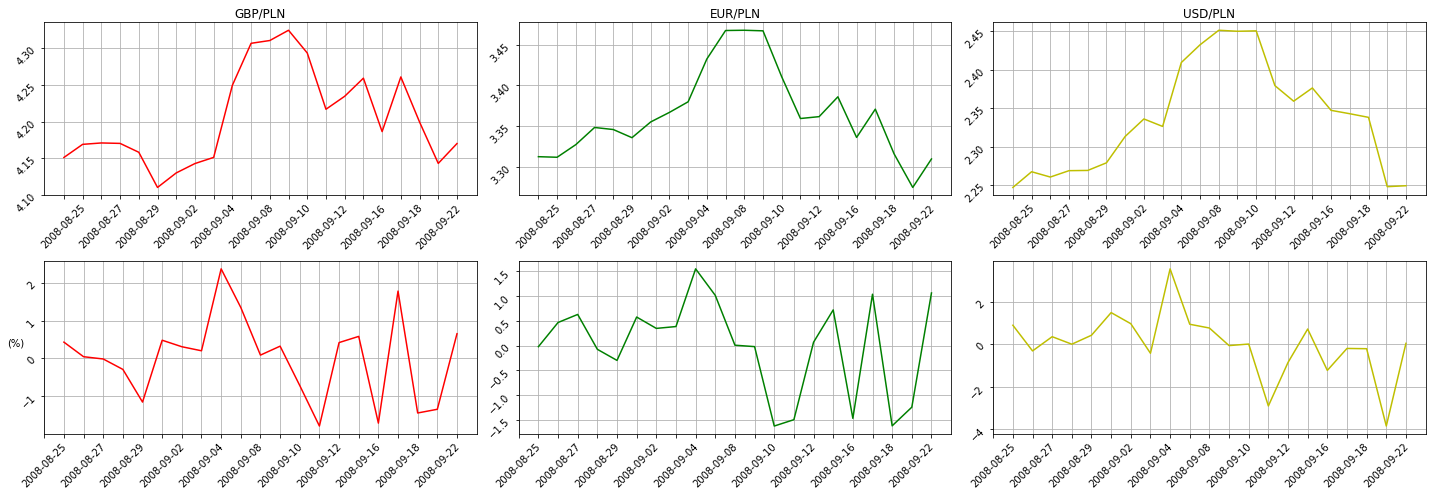

interactive(children=(FloatSlider(value=0.0, description='GBP (%)', layout=Layout(width='500px'), readout_form…

In [53]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,7))


ax1.plot(ccy1_series, color='r')
ax2.plot(ccy2_series, color='g')
ax3.plot(ccy3_series, color='y')
ax4.plot(ccy1_daily*100, color='r')
ax5.plot(ccy2_daily*100, color='g')
ax6.plot(ccy3_daily*100, color='y')

ax1.tick_params(labelrotation=45)
ax1.set_title(CCY_IN1+'/PLN')
ax1.grid()
[l.set_visible(False) for (i, l) in enumerate(ax1.xaxis.get_ticklabels()) if i % 2 !=0]
ax2.tick_params(labelrotation=45)
ax2.set_title(CCY_IN2+'/PLN')
ax2.grid()
[l.set_visible(False) for (i, l) in enumerate(ax2.xaxis.get_ticklabels()) if i % 2 !=0]
ax3.tick_params(labelrotation=45)
ax3.set_title(CCY_IN3+'/PLN')
ax3.grid()
[l.set_visible(False) for (i, l) in enumerate(ax3.xaxis.get_ticklabels()) if i % 2 !=0]

ax4.tick_params(labelrotation=45)
ax4.grid()
[l.set_visible(False) for (i, l) in enumerate(ax4.xaxis.get_ticklabels()) if i % 2 !=0]
ax4.set_ylabel('(%)', rotation=0, fontsize=10)
ax5.tick_params(labelrotation=45)
ax5.grid()
[l.set_visible(False) for (i, l) in enumerate(ax5.xaxis.get_ticklabels()) if i % 2 !=0]
ax6.tick_params(labelrotation=45)
ax6.grid()
[l.set_visible(False) for (i, l) in enumerate(ax6.xaxis.get_ticklabels()) if i % 2 !=0]

# plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

amp1 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN1 + ' (%)'),
                           readout_format ='.1f', layout=widgets.Layout(width='500px'))
amp2 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN2 + ' (%)'), 
                           readout_format ='.1f', layout=widgets.Layout(width='500px'))
amp3 = widgets.FloatSlider(min=0, max=100, step=0.5, value=0, description=str(CCY_IN3 + ' (%)'), 
                           readout_format ='.1f', layout=widgets.Layout(width='500px'))

def update_slider1(change):
    amp2.value = 100 - amp1.value - amp3.value
    amp3.value = 100 - amp2.value - amp1.value
def update_slider2(change):
    amp3.value = 100 - amp2.value - amp1.value
    amp1.value = 100 - amp3.value - amp2.value
def update_slider3(change):
    amp1.value = 100 - amp3.value - amp2.value
    amp2.value = 100 - amp1.value - amp3.value
    
amp1.observe(update_slider1, 'value')
amp2.observe(update_slider2, 'value')
amp3.observe(update_slider3, 'value')


def portfolio_plotter(A, B, C):
    fig, ax_plot = plt.subplots(figsize=(25,7))
    port_daily = pd.concat([ccy1_daily*1000*amp1.value/100, ccy2_daily*1000*amp2.value/100, ccy3_daily*1000*amp3.value/100],
                               axis=1, join='inner').sum(axis=1).dropna()
    port_logdaily = pd.concat([ccy1_logdaily*amp1.value/100, ccy2_logdaily*amp2.value/100, ccy3_logdaily*amp3.value/100],
                               axis=1, join='inner').sum(axis=1).dropna()
    condition = np.array2string(np.where(max(float(ccy1_daily.sum()), float(ccy2_daily.sum()), float(ccy3_daily.sum()))==float(ccy1_daily.sum()), CCY_IN1, np.where(
        max(float(ccy1_daily.sum()), float(ccy2_daily.sum()), float(ccy3_daily.sum()))==float(ccy2_daily.sum()), CCY_IN2, CCY_IN3)))
    
    ax_plot.plot(port_daily)
    [l.set_visible(False) for (i, l) in enumerate(ax_plot.xaxis.get_ticklabels()) if i % 2 !=0]
    plt.ylabel('Total return (in PLN)', size=13)
    plt.grid()
    plt.show()
    print('')
    display(HTML('Mean return for the portfolio is <b>PLN {mean}</b>. The daily volatility during investment period was <b>{vol} %</b>.'.format(
        mean=port_daily.mean().round(4), 
        vol=(port_logdaily.std()*np.sqrt(len(port_logdaily)*100)).round(3))))
    display(HTML('The best day for the portfolio was <b>{day1}</b>, while the worst was <b>{day2}</b>'.format(
        day1=port_daily.idxmax(),
        day2=port_daily.idxmin())))
    display(HTML('The best performing currency was <b>{}</b>'.format(condition)))

iplot = widgets.interactive(portfolio_plotter, A = amp1, B = amp2, C = amp3 )
display(iplot)

